In [38]:
using DataFrames
using CSV
using StatsPlots
using Statistics

function plot_df(df::AbstractDataFrame,graph_type::Symbol)
    numerical_cols = Symbol.(names(df,Real))
    @df df Plots.plot(cols(numerical_cols); layout = length(numerical_cols), seriestype = graph_type,
    title=permutedims(numerical_cols),
    frame=:box)
end

function get_mean_by_survival(colname, value)
    data = train_data[!, colname][all.(i->(i == value), eachrow(train_data.Survived)), :]
    data = collect(skipmissing(data))
    return mean(data);
end 

get_mean_by_survival (generic function with 1 method)

In [3]:
train_data = CSV.read("train.csv", DataFrame)
test_data = CSV.read("test.csv", DataFrame)

,PassengerId,Pclass,Name,Sex
,Int64,Int64,String,String7
1,892,3,"Kelly, Mr. James",male
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female
3,894,2,"Myles, Mr. Thomas Francis",male
4,895,3,"Wirz, Mr. Albert",male
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
6,897,3,"Svensson, Mr. Johan Cervin",male
7,898,3,"Connolly, Miss. Kate",female
8,899,2,"Caldwell, Mr. Albert Francis",male
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female


In [5]:
train_data[!, "is_test"] .= 0
test_data[!, "Survived"] .= NaN
test_data[!, "is_test"] .= 1
all_data = vcat(train_data, test_data)

,PassengerId,Survived,Pclass,Name
,Int64,Float64,Int64,String
1,1,0.0,3,"Braund, Mr. Owen Harris"
2,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
3,3,1.0,3,"Heikkinen, Miss. Laina"
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,5,0.0,3,"Allen, Mr. William Henry"
6,6,0.0,3,"Moran, Mr. James"
7,7,0.0,1,"McCarthy, Mr. Timothy J"
8,8,0.0,3,"Palsson, Master. Gosta Leonard"
9,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


In [6]:
avg_age = median(collect(skipmissing(all_data[!, "Age"])))
replace!(all_data.Age, missing => avg_age);
all_data[!,:Age] = convert.(Float64,all_data[!,:Age])

1309-element Array{Float64,1}:
 22.0
 38.0
 26.0
 35.0
 35.0
 28.0
 54.0
  2.0
 27.0
 14.0
  4.0
 58.0
 20.0
  ⋮
 23.0
 50.0
 28.0
  3.0
 28.0
 37.0
 28.0
 28.0
 39.0
 38.5
 28.0
 28.0

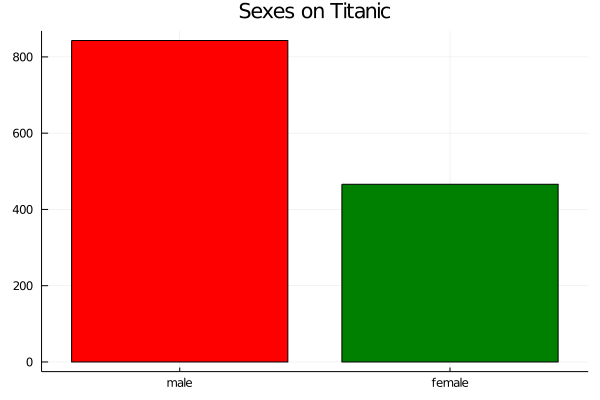

In [17]:
sex_counts = combine(groupby(all_data, [:Sex]), nrow => :count)
bar(1:2, sex_counts[!, "count"], width=0.7, xticks=(:G1, :G2))
plot(["male"; "female"],sex_counts[!, :count], seriestype = :bar,title="Sexes on Titanic", color=["red", "green"], legend=false)


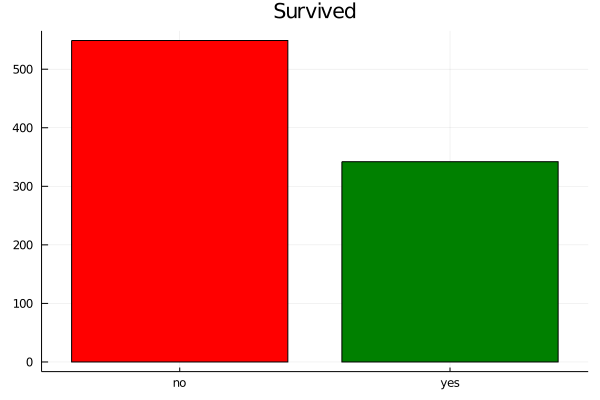

In [16]:
survived_counts = combine(groupby(train_data, [:Survived]), nrow => :count)
bar(1:2, survived_counts[!, "count"], width=0.7, xticks=(:G1, :G2))
plot(["no"; "yes"],survived_counts[!, :count], seriestype = :bar,title="Survived", color=["red", "green"], legend=false)


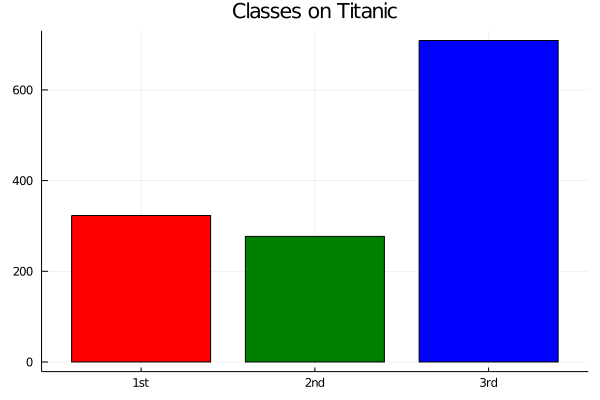

In [25]:
class_counts = combine(groupby(all_data, [:Pclass]), nrow => :count)
bar(1:3, class_counts[!, "count"], width=0.7)
plot(["1st"; "2nd"; "3rd"],class_counts[!, :count], seriestype = :bar,title="Classes on Titanic", color=["red", "green", "blue"], legend=false)

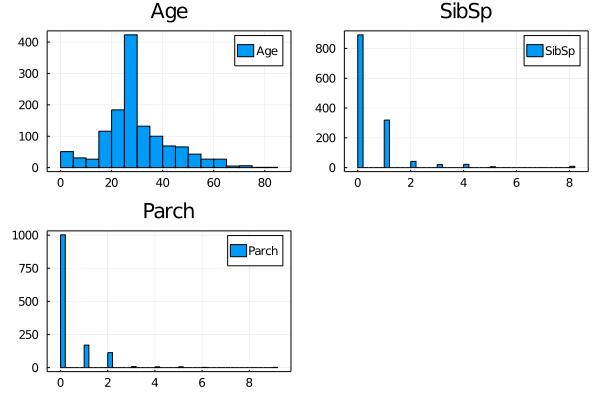

In [28]:
cols = [:Age, :SibSp, :Parch]
plot_df(all_data[!, cols], :histogram)

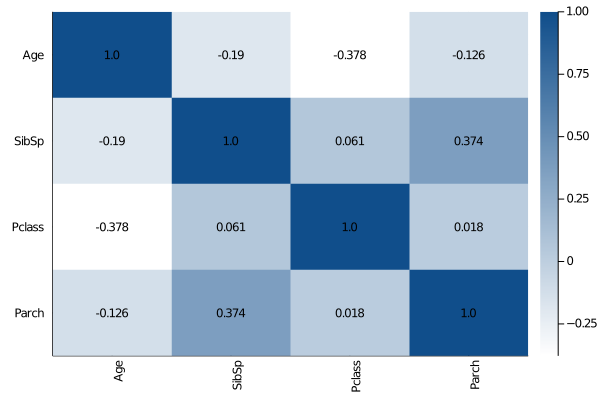

In [41]:
cols = [:Age, :SibSp, :Pclass, :Parch]
M = cor(Matrix(all_data[!,cols]))       
(n,m) = size(M)
heatmap(M, fc=cgrad([:white,:dodgerblue4]), xticks=(1:m,cols), xrot=90, yticks=(1:m,cols), yflip=true,bottom_margin = 5Plots.mm)
annotate!([(j, i, text(round(M[i,j],digits=3), 8,"Computer Modern",:black)) for i in 1:n for j in 1:m])

In [34]:
combine(groupby(train_data, [:Survived, :Pclass]), nrow => :count)

,Survived,Pclass,count
,Int64,Int64,Int64
1,0,1,80
2,0,2,97
3,0,3,372
4,1,1,136
5,1,2,87
6,1,3,119


In [33]:
combine(groupby(train_data, [:Survived, :Sex]), nrow => :count)

,Survived,Sex,count
,Int64,String7,Int64
1,0,male,468
2,0,female,81
3,1,male,109
4,1,female,233


In [36]:
combine(groupby(train_data, [:Survived, :Embarked]), nrow => :count)

,Survived,Embarked,count
,Int64,String1?,Int64
1,0,S,427
2,0,C,75
3,0,Q,47
4,1,S,217
5,1,C,93
6,1,Q,30
7,1,missing,2


In [40]:
DataFrame(
            Survived = [0, 1], 
            Fare = [get_mean_by_survival("Fare", 0), get_mean_by_survival("Fare", 1)],
            Parch = [get_mean_by_survival("Parch", 0), get_mean_by_survival("Parch", 1)],
            SibSp = [get_mean_by_survival("SibSp", 0), get_mean_by_survival("SibSp", 1)],
            Age = [get_mean_by_survival("Age", 0), get_mean_by_survival("Age", 1)]
            )

,Survived,Fare,Parch,SibSp,Age
,Int64,Float64,Float64,Float64,Float64
1,0,22.1179,0.32969,0.553734,30.6262
2,1,48.3954,0.464912,0.473684,28.3437
